In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## 1.Data Understanding
1. Shape?
2. Columns?
3. Data? head, samples
4. Null values
5. out laiyers / abnormality - in terms of Data understanding
6. Data Types

In [2]:
df=pd.read_csv('Heart_Disease_Prediction.csv')

In [3]:
df

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,Presence
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,Absence
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,Presence
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,Absence
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,Absence
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
265,52,1,3,172,199,1,0,162,0,0.5,1,0,7,Absence
266,44,1,2,120,263,0,0,173,0,0.0,1,0,7,Absence
267,56,0,2,140,294,0,2,153,0,1.3,2,0,3,Absence
268,57,1,4,140,192,0,0,148,0,0.4,2,0,6,Absence


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      270 non-null    int64  
 1   Sex                      270 non-null    int64  
 2   Chest pain type          270 non-null    int64  
 3   BP                       270 non-null    int64  
 4   Cholesterol              270 non-null    int64  
 5   FBS over 120             270 non-null    int64  
 6   EKG results              270 non-null    int64  
 7   Max HR                   270 non-null    int64  
 8   Exercise angina          270 non-null    int64  
 9   ST depression            270 non-null    float64
 10  Slope of ST              270 non-null    int64  
 11  Number of vessels fluro  270 non-null    int64  
 12  Thallium                 270 non-null    int64  
 13  Heart Disease            270 non-null    object 
dtypes: float64(1), int64(12), 

In [5]:
df.shape

(270, 14)

In [6]:
df.columns

Index(['Age', 'Sex', 'Chest pain type', 'BP', 'Cholesterol', 'FBS over 120',
       'EKG results', 'Max HR', 'Exercise angina', 'ST depression',
       'Slope of ST', 'Number of vessels fluro', 'Thallium', 'Heart Disease'],
      dtype='object')

In [7]:
df.insert(0, "patient_id", range(1, len(df) + 1)) #includes patient_id column which is very important for heart prediction model....

In [8]:
df.columns = df.columns.str.strip().str.replace(" ", "_")

In [9]:
df.head()

,patient_id,Age,Sex,Chest_pain_type,BP,Cholesterol,FBS_over_120,EKG_results,Max_HR,Exercise_angina,ST_depression,Slope_of_ST,Number_of_vessels_fluro,Thallium,Heart_Disease
0,1,70,1,4,130,322,0,2,109,0,2.4,2,3,3,Presence
1,2,67,0,3,115,564,0,2,160,0,1.6,2,0,7,Absence
2,3,57,1,2,124,261,0,0,141,0,0.3,1,0,7,Presence
3,4,64,1,4,128,263,0,0,105,1,0.2,2,1,7,Absence
4,5,74,0,2,120,269,0,2,121,1,0.2,1,1,3,Absence


In [10]:
df.tail()

,patient_id,Age,Sex,Chest_pain_type,BP,Cholesterol,FBS_over_120,EKG_results,Max_HR,Exercise_angina,ST_depression,Slope_of_ST,Number_of_vessels_fluro,Thallium,Heart_Disease
265,266,52,1,3,172,199,1,0,162,0,0.5,1,0,7,Absence
266,267,44,1,2,120,263,0,0,173,0,0.0,1,0,7,Absence
267,268,56,0,2,140,294,0,2,153,0,1.3,2,0,3,Absence
268,269,57,1,4,140,192,0,0,148,0,0.4,2,0,6,Absence
269,270,67,1,4,160,286,0,2,108,1,1.5,2,3,3,Presence


In [11]:
df.sample(5)

,patient_id,Age,Sex,Chest_pain_type,BP,Cholesterol,FBS_over_120,EKG_results,Max_HR,Exercise_angina,ST_depression,Slope_of_ST,Number_of_vessels_fluro,Thallium,Heart_Disease
201,202,58,1,4,125,300,0,2,171,0,0.0,1,2,7,Presence
222,223,57,1,3,150,168,0,0,174,0,1.6,1,0,3,Absence
137,138,56,1,4,125,249,1,2,144,1,1.2,2,1,3,Presence
227,228,43,0,4,132,341,1,2,136,1,3.0,2,0,7,Presence
139,140,57,1,4,132,207,0,0,168,1,0.0,1,0,7,Absence


In [12]:
df.dtypes

patient_id                   int64
Age                          int64
Sex                          int64
Chest_pain_type              int64
BP                           int64
Cholesterol                  int64
FBS_over_120                 int64
EKG_results                  int64
Max_HR                       int64
Exercise_angina              int64
ST_depression              float64
Slope_of_ST                  int64
Number_of_vessels_fluro      int64
Thallium                     int64
Heart_Disease               object
dtype: object

In [13]:
df.describe()

,patient_id,Age,Sex,Chest_pain_type,BP,Cholesterol,FBS_over_120,EKG_results,Max_HR,Exercise_angina,ST_depression,Slope_of_ST,Number_of_vessels_fluro,Thallium
count,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.00000,270.000000,270.000000,270.000000
mean,135.500000,54.433333,0.677778,3.174074,131.344444,249.659259,0.148148,1.022222,149.677778,0.329630,1.05000,1.585185,0.670370,4.696296
std,78.086491,9.109067,0.468195,0.950090,17.861608,51.686237,0.355906,0.997891,23.165717,0.470952,1.14521,0.614390,0.943896,1.940659
min,1.000000,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.00000,1.000000,0.000000,3.000000
25%,68.250000,48.000000,0.000000,3.000000,120.000000,213.000000,0.000000,0.000000,133.000000,0.000000,0.00000,1.000000,0.000000,3.000000
50%,135.500000,55.000000,1.000000,3.000000,130.000000,245.000000,0.000000,2.000000,153.500000,0.000000,0.80000,2.000000,0.000000,3.000000
75%,202.750000,61.000000,1.000000,4.000000,140.000000,280.000000,0.000000,2.000000,166.000000,1.000000,1.60000,2.000000,1.000000,7.000000
max,270.000000,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.20000,3.000000,3.000000,7.000000


#### result: no null values 👇

In [14]:
df.isnull().sample(5) # we will check random values rather their is null values or not???

,patient_id,Age,Sex,Chest_pain_type,BP,Cholesterol,FBS_over_120,EKG_results,Max_HR,Exercise_angina,ST_depression,Slope_of_ST,Number_of_vessels_fluro,Thallium,Heart_Disease
174,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
253,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
208,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
96,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
68,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [15]:
df.isna().sum() #this tells that if there is no null values or basically sum it 

patient_id                 0
Age                        0
Sex                        0
Chest_pain_type            0
BP                         0
Cholesterol                0
FBS_over_120               0
EKG_results                0
Max_HR                     0
Exercise_angina            0
ST_depression              0
Slope_of_ST                0
Number_of_vessels_fluro    0
Thallium                   0
Heart_Disease              0
dtype: int64

### duplicate values

In [16]:
df.duplicated().sample(5)

248    False
216    False
89     False
250    False
76     False
dtype: bool

In [17]:
df.duplicated().sample(5).info()

<class 'pandas.core.series.Series'>
Index: 5 entries, 177 to 133
Series name: None
Non-Null Count  Dtype
--------------  -----
5 non-null      bool 
dtypes: bool(1)
memory usage: 45.0 bytes


In [18]:
df.columns

Index(['patient_id', 'Age', 'Sex', 'Chest_pain_type', 'BP', 'Cholesterol',
       'FBS_over_120', 'EKG_results', 'Max_HR', 'Exercise_angina',
       'ST_depression', 'Slope_of_ST', 'Number_of_vessels_fluro', 'Thallium',
       'Heart_Disease'],
      dtype='object')

## Data Visualization model using matplotlib

In [34]:
# df['Age'].value_counts().plot(kind='hist',title='Age Distributions')                     # Show the figure.

### 1) Age distribution (Histogram)
### 2) Max_HR spread (Box Plot)
### 3) Age vs Max_HR (Scatter Plot)
### 4) Average Max_HR by Age (Line Plot (Trend))
### 5)  Male vs Female ratio (Pie Chart)

## TOP 5 charts
### Distribution

### Spread

### Relationship

### Trend

### Proportion

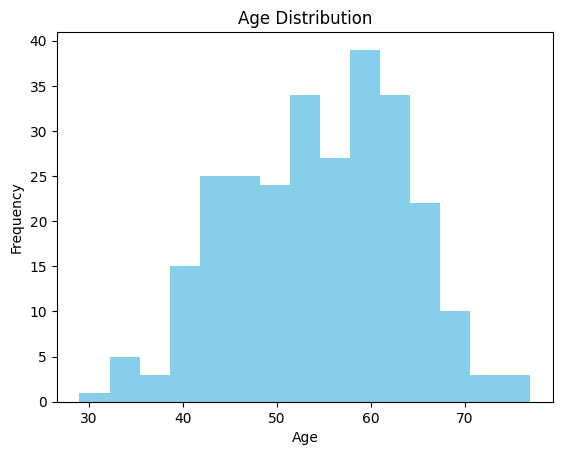

In [58]:

plt.figure()
plt.hist(df["Age"], bins=15,color="Skyblue")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.title("Age Distribution")
plt.show()

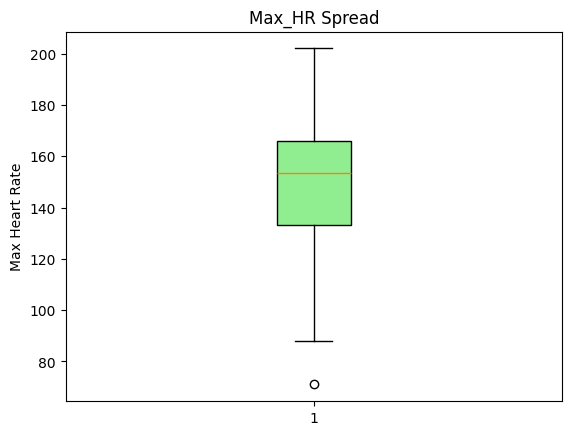

In [73]:
plt.figure()
plt.boxplot(df["Max_HR"], patch_artist=True,
            boxprops=dict(facecolor="lightgreen"))
plt.ylabel("Max Heart Rate")
plt.title("Max_HR Spread")
plt.show()

## Age VS Max_HR

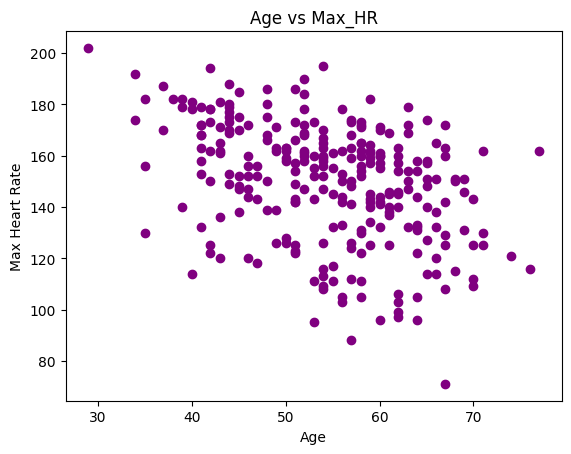

In [53]:
plt.figure()
plt.scatter(df['Age'],df['Max_HR'],color="purple")
plt.xlabel('Age')
plt.ylabel("Max Heart Rate")
plt.title("Age vs Max_HR")
plt.show()

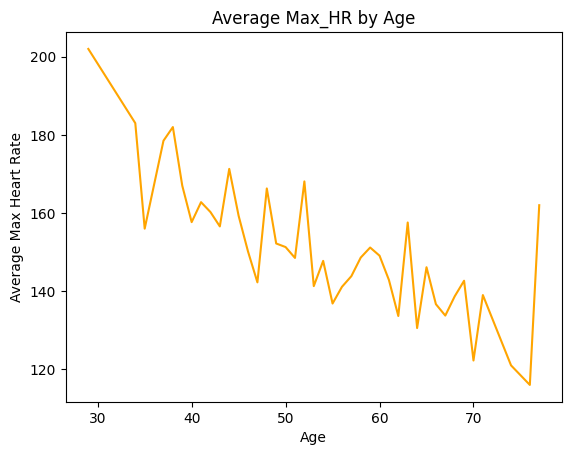

In [59]:
# Average Max_HR by Age (Line Plot (Trend))
avg_hr = df.groupby("Age")["Max_HR"].mean()
plt.figure()
plt.plot(avg_hr.index, avg_hr.values,color="Orange")
plt.xlabel('Age')
plt.ylabel('Average Max Heart Rate')
plt.title('Average Max_HR by Age')
plt.show()

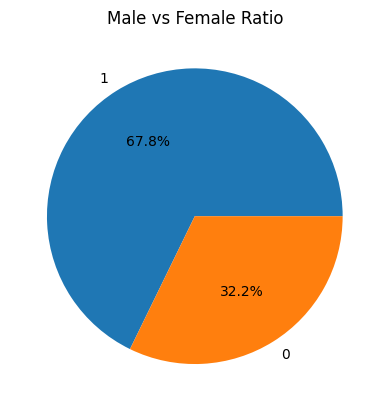

In [69]:
gender_counts=df['Sex'].value_counts()
plt.figure()
plt.pie(gender_counts.values, labels=gender_counts.index.astype(str),autopct="%1.1f%%")
plt.title("Male vs Female Ratio")
plt.show()